In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
dataset = pd.read_csv('./dataset/incheon_201707_1min_josuk.txt')

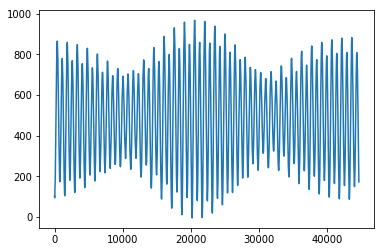

In [121]:
plt.plot(dataset.ele)

In [122]:
ele = np.array(dataset.ele)
train_ele = ele[:40000]
test_ele = ele[40000:44000]

In [123]:
data_len = len(ele)
print(data_len)

44640


In [124]:
# define train dataset

In [125]:
X_train = []
y_train = []

In [126]:
for i in range(50, 40000):
    X_train.append(train_ele[i-50:i])
    y_train.append(train_ele[i])
print(np.shape(X_train), np.shape(y_train))    

(39950, 50) (39950,)


In [127]:
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.array(y_train)

In [128]:
# define test dataset

In [155]:
X_test = []
y_test = []

In [156]:
for i in range(50, 4000):
    X_test.append(test_ele[i-50:i])
    y_test.append(test_ele[i])
print(np.shape(X_test), np.shape(y_test))   

(3950, 50) (3950,)


In [157]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)

In [132]:
# Building the RNN

In [133]:
# import package

In [134]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [135]:
# initializing the RNN

In [136]:
regressor = Sequential()

In [137]:
# adding the first LSTM layer and some dropout regularization

In [138]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [139]:
# adding the second LSTM layer and some dropout regularization

In [140]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [141]:
# adding the third LSTM layer and some dropout regularization

In [142]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [143]:
# adding the fourth LSTM layer and some dropout regularization

In [144]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [145]:
# adding the output layer

In [146]:
regressor.add(Dense(units = 1))

In [147]:
# compiling the RNN

In [148]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [149]:
# fitting the RNN to the Training set

In [151]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
39950/39950 [==============================] - 28s 702us/step - loss: 249117.6753
Epoch 2/100
39950/39950 [==============================] - 28s 706us/step - loss: 245634.2433
Epoch 3/100
39950/39950 [==============================] - 29s 717us/step - loss: 242161.5422
Epoch 4/100
39950/39950 [==============================] - 29s 729us/step - loss: 238813.6619
Epoch 5/100
39950/39950 [==============================] - 29s 726us/step - loss: 235426.6526
Epoch 6/100
39950/39950 [==============================] - 30s 742us/step - loss: 232137.7048
Epoch 7/100
39950/39950 [==============================] - 29s 734us/step - loss: 228846.6315
Epoch 8/100
39950/39950 [==============================] - 30s 739us/step - loss: 225627.0764
Epoch 9/100
39950/39950 [==============================] - 30s 746us/step - loss: 222467.6396
Epoch 10/100
39950/39950 [==============================] - 29s 737us/step - loss: 219264.6132
Epoch 11/100
39950/39950 [==============================] -

39950/39950 [==============================] - 29s 731us/step - loss: 63269.3777
Epoch 88/100
39950/39950 [==============================] - 30s 738us/step - loss: 61890.6311
Epoch 89/100
39950/39950 [==============================] - 29s 734us/step - loss: 60860.0381
Epoch 90/100
39950/39950 [==============================] - 29s 730us/step - loss: 59817.7046
Epoch 91/100
39950/39950 [==============================] - 30s 753us/step - loss: 58588.6115
Epoch 92/100
39950/39950 [==============================] - 31s 780us/step - loss: 57576.1517
Epoch 93/100
39950/39950 [==============================] - 30s 758us/step - loss: 56453.9178
Epoch 94/100
39950/39950 [==============================] - 29s 732us/step - loss: 55214.1292
Epoch 95/100
39950/39950 [==============================] - 30s 742us/step - loss: 54281.8462
Epoch 96/100
39950/39950 [==============================] - 31s 772us/step - loss: 53141.1584
Epoch 97/100
39950/39950 [==============================] - 29s 733us/ste

In [158]:
predict = regressor.predict(X_test)

Text(0,0.5,'height')

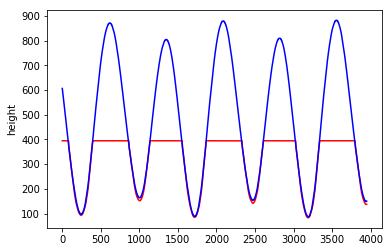

In [159]:
plt.plot(predict, color = 'red', label = 'Predict')
plt.plot(y_test, color = 'blue', label = 'Real')
plt.ylabel('height')